## Trajectory inference // Harmony and Palantir 

Author: Lieke L van de Haar (18112020)

__Palantir__

Characterization of cell fate probabilities in single-cell data with Palantir
Manu Setty, Vaidotas Kiseliovas, Jacob Levine, Adam Gayoso, Linas Mazutis and Dana Pe'er
Nature Biotechnology, 2019, https://doi.org/10.1038/s41587-019-0068-4, doi=10.1038/s41587-019-0068-4

For detailed information on Palantir: https://github.com/dpeerlab/Palantir

__Harmony__

Nowotschin, S., Setty, M., Kuo, Y. et al. The emergent landscape of the mouse gut endoderm at single-cell resolution. Nature 569, 361–367 (2019). https://doi.org/10.1038/s41586-019-1127-1

For detailed information on Palantir: https://github.com/dpeerlab/Harmony 

In [1]:
import harmony
import palantir

# Plotting and miscellaneous imports
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np

# Initialize random seed
import random
random.seed(101)

sc.settings.figdir = "../../../figures/DevelopmentalHb/TrajectoryInference/"

%matplotlib inline

/Users/liekevandehaar/opt/anaconda3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


### Load data:

In [2]:
adata = sc.read_h5ad('../../../data/output/DevelopmentalHb/Mar2020_embryo_Hb_Pou4f1_louvain_seurat.h5ad')

/Users/liekevandehaar/opt/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/Users/liekevandehaar/opt/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


### Harmony augmented affinity matrix
The following metadata information is necessary for Harmony
1. Timepoint at which each cell was measured
2. Connections between timepoints for computation of mutually nearest neighbors

The timepoint at which each cell was measured for this dataset can be determined by string matching since the information has been added to the barcode name

In [3]:
tp = adata.obs["stage"].astype('object')

Using the above information, the augmented and non-augmented affinity matrices can be computed using

In [5]:
aug_aff = sc.external.tl.harmony_timeseries(adata, "stage", n_components=2500) #2500

Running PCA with 1136 components
Nearest neighbor computation...


/Users/liekevandehaar/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/liekevandehaar/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/Users/liekevandehaar/opt/anaconda3/lib/python3.7/site-packages/harmony/core.py:61: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  kNN = temp.uns['neighbors']['distances']


Constucting affinities between E11 and E12...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E12 and E13...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E13 and E15...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E15 and E18...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E18 and P4...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between P4 and P7...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between P7 and adult...
t+1 neighbors of t...
t neighbors of t+1...


100%|██████████| 500/500 [00:22<00:00, 21.96it/s]

BarnesHut Approximation  took  10.81  seconds
Repulsion forces  took  10.09  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.75  seconds
AdjustSpeedAndApplyForces step  took  0.41  seconds


### Visualization using force directed layouts
The relationships between timepoints can be visualized using a force directed layout. This layout can be computed using the following function

In [4]:
adata

AnnData object with n_obs × n_vars = 2773 × 3783
    obs: 'n_genes', 'plate', 'platebatch', 'stage', 'well_no', 'ERCC_genes', 'n_total_counts', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_protein_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'n_counts_norm', 'Tac1_norm_expr', 'cellnr', 'louvain', 'velocity_self_transition'
    var: 'ENS_names', 'geneid', 'feature', 'chr', 'fullname', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'stage_colors', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_settings'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'velocity_tsne', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'var

In [ ]:
adata.write('../../../data/output/DevelopmentalHb/Mar2020_embryo_Hb_Pou4f1_Harmony_Palantir_intermediate.h5ad')

In [5]:
adata = sc.read('../../../data/output/DevelomentalHb/Mar2020_embryo_Hb_Pou4f1_Harmony_Palantir_intermediate.h5ad')

In [6]:
## create objects necessary for downstream analysis
layout = pd.DataFrame(data=adata.obsm["X_harmony"], index=adata.obs_names, columns=["x", "y"])
aff = adata.obsp['harmony_aff']
aug_aff = adata.obsp['harmony_aff_aug']

#difference between depicture of plots between Harmony package and Harmony implementation in Scanpy

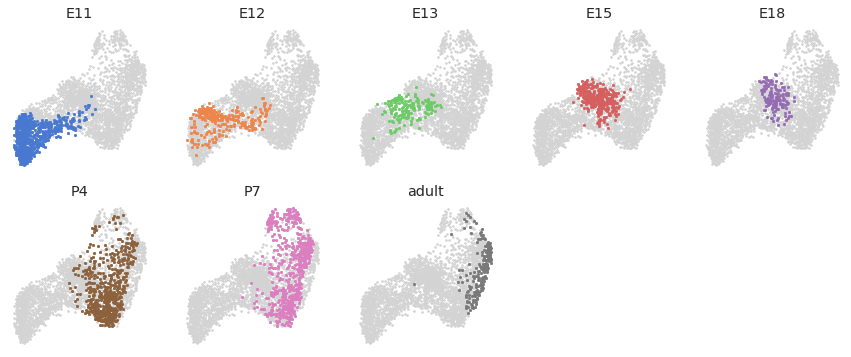

In [7]:
harmony.plot.plot_timepoints(layout, tp)
fig = plt.gcf()
fig.savefig('../../../figures/embryo_Hb/harmony_timepoints.pdf', dpi=80)

### Palantir trajectory detection
<a href=" https://github.com/dpeerlab/Palantir">Palantir</a> is an algorithm developed by the Pe'er lab to align cells along differentiation trajectories. Palantir models differentiation as a stochastic process where stem cells differentiate to terminally differentiated cells by a series of steps through a low dimensional phenotypic manifold. Palantir effectively captures the continuity in cell states and the stochasticity in cell fate determination.

The first step in Palantir trajectory detection is to project data onto diffusion maps. Harmony augmented affinity matrix is used as the input for identifying diffusion maps. Please see https://github.com/dpeerlab/Palantir for more details on Palantir

In [8]:
dm_res = palantir.utils.run_diffusion_maps(aug_aff)
ms_data = palantir.utils.determine_multiscale_space(dm_res)
ms_data.index = adata.obs_names

## Find Tfap2b high starting cells and Calb2 (LHb) high and Chat (MHb) high terminal cells 

In [9]:
gene_name = "Tfap2b"

In [47]:
test = adata[adata[:, gene_name].X > 4.3] ## max expression 

In [48]:
test.obs.index

Index(['Habenula_012___E11_1__X160', 'Habenula_012___E11_1__X305',
       'Habenula_012___E11_1__X326', 'Habenula_012___E11_1__X350',
       'Habenula_013___E11_2__X110', 'Habenula_013___E11_2__X243',
       'Habenula_013___E11_2__X270', 'Habenula_013___E11_2__X301',
       'Habenula_013___E11_2__X350', 'Habenula_022___E12_1__X303',
       'Habenula_022___E12_1__X322'],
      dtype='object')

In [49]:
start_cell = list(test.obs.index)

In [50]:
gene_name = "Calb2"

In [51]:
test = adata[adata[:, gene_name].X > 3.0]

In [52]:
test.obs.index

Index(['Habenula_007___E15_1__X180', 'Habenula_019___P7_2__X043',
       'Habenula_017___adult_2__X120', 'Habenula_017___adult_2__X145',
       'Habenula_017___adult_2__X166', 'Habenula_017___adult_2__X194',
       'Habenula_017___adult_2__X214', 'Habenula_017___adult_2__X238'],
      dtype='object')

In [53]:
terminal_cells = list(test.obs.index)

In [188]:
gene_name = "Chat"

In [189]:
test = adata[adata[:, gene_name].X > 3.5]

In [190]:
test.obs.index

Index(['Habenula_011___E15_2__X271', 'Habenula_020___P4_1__X043',
       'Habenula_020___P4_1__X067', 'Habenula_020___P4_1__X187',
       'Habenula_020___P4_1__X242', 'Habenula_020___P4_1__X262',
       'Habenula_020___P4_1__X338', 'Habenula_020___P4_1__X340',
       'Habenula_020___P4_1__X342', 'Habenula_021___P4_2__X026',
       'Habenula_021___P4_2__X245', 'Habenula_021___P4_2__X269',
       'Habenula_018___P7_1__X094', 'Habenula_018___P7_1__X274',
       'Habenula_019___P7_2__X207', 'Habenula_019___P7_2__X272',
       'Habenula_019___P7_2__X278', 'Habenula_015___adult_1__X051',
       'Habenula_017___adult_2__X161', 'Habenula_017___adult_2__X259'],
      dtype='object')

In [57]:
terminal_cells = list(test.obs.index)

In [58]:
terminal_cells =[ 'Habenula_015___adult_1__X051']

In [115]:
gene_name = "Esrrg"

In [118]:
test = adata[adata[:, gene_name].X > 3.5]

In [119]:
test.obs.index

Index(['Habenula_012___E11_1__X092', 'Habenula_012___E11_1__X103',
       'Habenula_012___E11_1__X142', 'Habenula_012___E11_1__X182',
       'Habenula_012___E11_1__X358', 'Habenula_013___E11_2__X023',
       'Habenula_013___E11_2__X139', 'Habenula_022___E12_1__X036',
       'Habenula_022___E12_1__X288', 'Habenula_007___E15_1__X073',
       'Habenula_007___E15_1__X301', 'Habenula_011___E15_2__X095',
       'Habenula_011___E15_2__X179', 'Habenula_020___P4_1__X072',
       'Habenula_020___P4_1__X198', 'Habenula_021___P4_2__X044',
       'Habenula_021___P4_2__X063', 'Habenula_021___P4_2__X097',
       'Habenula_021___P4_2__X182', 'Habenula_021___P4_2__X325',
       'Habenula_018___P7_1__X243', 'Habenula_019___P7_2__X056',
       'Habenula_019___P7_2__X154', 'Habenula_019___P7_2__X304',
       'Habenula_019___P7_2__X358', 'Habenula_017___adult_2__X153',
       'Habenula_017___adult_2__X257', 'Habenula_017___adult_2__X271'],
      dtype='object')

In [141]:
gene_name = "Gpr151"

In [142]:
test = adata[adata[:, gene_name].X > 3.5]

In [143]:
test.obs.index

Index(['Habenula_017___adult_2__X084', 'Habenula_017___adult_2__X120',
       'Habenula_017___adult_2__X230'],
      dtype='object')

In [201]:
cells = [

       'Habenula_017___adult_2__X161']

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a424c2e50>)

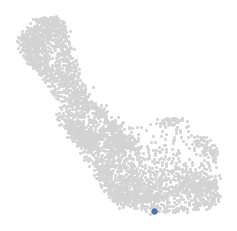

In [202]:
palantir.plot.highlight_cells_on_tsne(layout, cells)

In [10]:
# Start cell
# works well: start_cell = 'Habenula_013___E11_2__X270'
start_cell = 'Habenula_012___E11_1__X160'
# Terminal cells
# works well: terminal_cells = [ 'Habenula_017___adult_2__X145', 'Habenula_017___adult_2__X120']
# ['Habenula_015___adult_1__X051', 'Habenula_019___P7_2__X043', 'Habenula_019___P7_2__X358', 'Habenula_017___adult_2__X230'] = ['Chat', 'Gpr151', 'Calb2', 'Tac1']
terminal_cells = ['Habenula_017___adult_2__X161', 'Habenula_019___P7_2__X043']

Rename branch probabilities

(<Figure size 288x288 with 1 Axes>, <AxesSubplot:>)

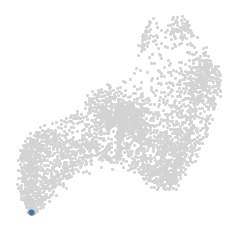

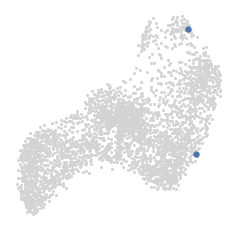

In [11]:
palantir.plot.highlight_cells_on_tsne(layout, start_cell)
palantir.plot.highlight_cells_on_tsne(layout, terminal_cells)

In [12]:
pr_res = palantir.core.run_palantir(ms_data, start_cell, terminal_cells, use_early_cell_as_start=True)

Sampling and flocking waypoints...
Time for determining waypoints: 0.008815352121988933 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.31299956639607746 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9995
Correlation at iteration 2: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [13]:
pr_res.branch_probs.columns = ['Chat', 'Calb2']

Palantir results can be visualized using the following function

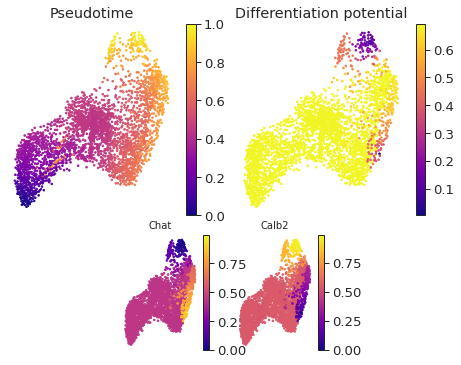

In [14]:
palantir.plot.plot_palantir_results(pr_res, layout)
fig = plt.gcf()
fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_pseudotime.pdf', dpi=80)

<a id='mg'></a><h3>MAGIC imputation</h3>

In [15]:
adata_df = pd.DataFrame(data=adata.X, index=adata.obs_names, columns=adata.var_names)

In [16]:
imp_df = palantir.utils.run_magic_imputation(adata_df, dm_res)

<a id='vs'></a><h3>Visualizing gene expression</h3>

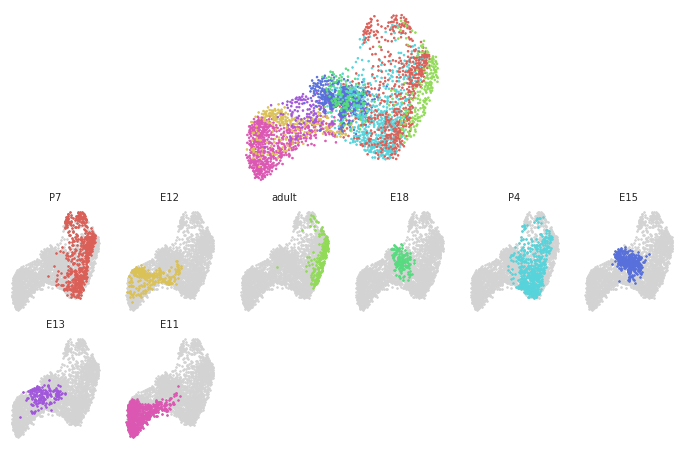

In [17]:
palantir.plot.plot_cell_clusters(layout, adata.obs['stage'] )
fig = plt.gcf()
fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_stage_2.pdf', dpi=80)

In [21]:
adata.uns['louvain_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2'], dtype=object)

TypeError: gcf() got an unexpected keyword argument 'cmap'

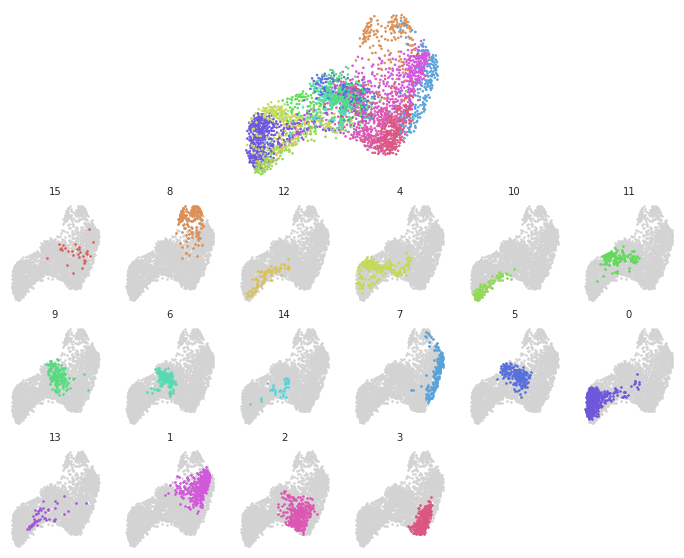

In [18]:
n_cols = 6
clusters = adata.obs["louvain"]

listed_clusters = list(np.unique(clusters))
listed_clusters.sort(key=int)
serie = pd.Series(adata.uns["louvain_colors"], index=listed_clusters)
cluster_colors = serie.reindex(['6','3','0','1','10','9','12','8','7','2','13','4','11','5'])
n_clusters = len(set(clusters))

n_rows = int(np.ceil(n_clusters / n_cols))
fig = plt.figure(figsize=[2 * n_cols, 2 * (n_rows + 2)])
gs = plt.GridSpec(
    n_rows + 2, n_cols, height_ratios=np.append([0.75, 0.75], np.repeat(1, n_rows))
)

ax = plt.subplot(gs[0:2, 2:4])
ax.scatter(layout["x"], layout["y"], s=3, color=cluster_colors[clusters[layout.index]])
ax.set_axis_off()

for i, cluster in enumerate(set(clusters)):
    row = int(np.floor(i / n_cols))
    ax = plt.subplot(gs[row + 2, i % n_cols])
    ax.scatter(layout.loc[:, "x"], layout.loc[:, "y"], s=3, color="lightgrey")
    cells = clusters.index[clusters == cluster]
    ax.scatter(
        layout.loc[cells, "x"],
        layout.loc[cells, "y"],
        s=3,
        color=cluster_colors[cluster],
    )
    ax.set_axis_off()
    ax.set_title(cluster, fontsize=10)

In [ ]:
n_cols = 6
stages = adata.obs["stage"]

serie = pd.Series(adata.uns["stage_colors"], index=list(np.unique(stages)))
stage_colors = serie.reindex(['E13','adult','P7','E12','E15','E11','E18','P4'])
n_stages = len(set(stages))

n_rows = int(np.ceil(n_stages / n_cols))
fig = plt.figure(figsize=[2 * n_cols, 2 * (n_rows + 2)])
gs = plt.GridSpec(
    n_rows + 2, n_cols, height_ratios=np.append([0.75, 0.75], np.repeat(1, n_rows))
)

ax = plt.subplot(gs[0:2, 2:4])
ax.scatter(layout["x"], layout["y"], s=3, color=stage_colors[stages[layout.index]])
ax.set_axis_off()

for i, stage in enumerate(set(stages)):
    row = int(np.floor(i / n_cols))
    ax = plt.subplot(gs[row + 2, i % n_cols])
    ax.scatter(layout.loc[:, "x"], layout.loc[:, "y"], s=3, color="lightgrey")
    cells = clusters.index[stages == stage]
    ax.scatter(
        layout.loc[cells, "x"],
        layout.loc[cells, "y"],
        s=3,
        color=stage_colors[stage],
    )
    ax.set_axis_off()
    ax.set_title(stage, fontsize=10)

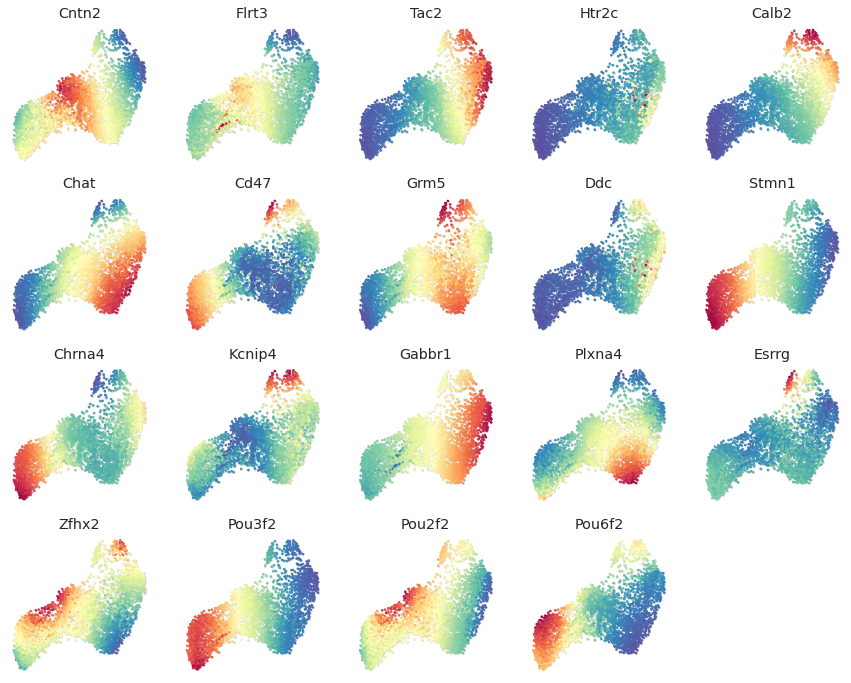

In [19]:
palantir.plot.plot_gene_expression(imp_df, layout, ['Cntn2', 'Flrt3', 'Tac2', 'Htr2c', 'Calb2', 'Chat',
                                                    'Cd47', 'Grm5', 'Ddc', 'Stmn1', 'Chrna4', 'Kcnip4', 
                                                    "Gabbr1", 'Plxna4', 'Esrrg', 'Zfhx2', 'Pou3f2', 'Pou2f2', 'Pou6f2'])

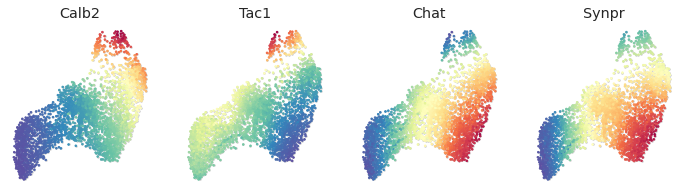

In [20]:
palantir.plot.plot_gene_expression(imp_df, layout, ['Calb2', 'Tac1', 'Chat', 'Synpr'])
fig = plt.gcf()
fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_markers.pdf', dpi=80)

The following genes were either not observed in the experiment, or the wrong gene symbol was used: {'Nhxph1'}


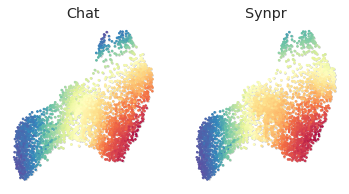

In [21]:
palantir.plot.plot_gene_expression(imp_df, layout, ['Chat', 'Synpr', 'Nhxph1'])
fig = plt.gcf()

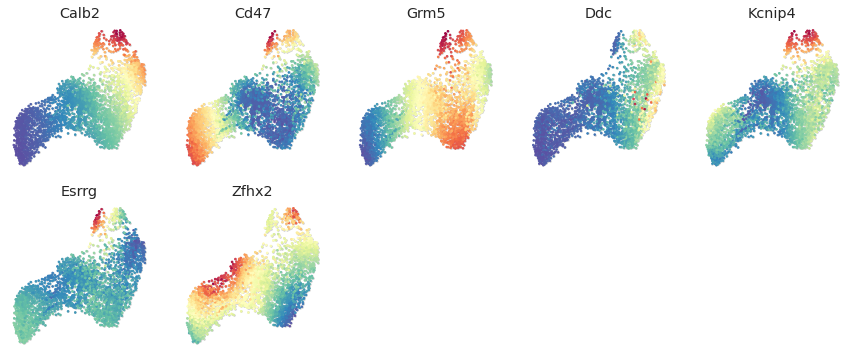

In [22]:
## LHb markers according to Stuber
palantir.plot.plot_gene_expression(imp_df, layout, ['Calb2', 'Cd47', 'Grm5', 'Ddc','Kcnip4','Esrrg', 'Zfhx2'])
fig = plt.gcf()
#fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_LHb_marker_1.pdf', dpi=80)

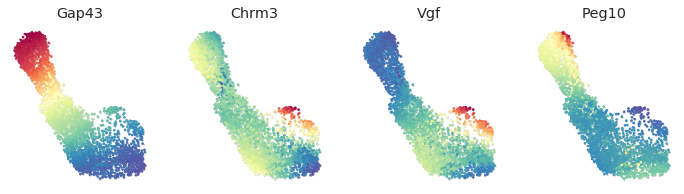

In [69]:
## LHb markers according to Sabatini
palantir.plot.plot_gene_expression(imp_df, layout, ['Gap43', 'Chrm3', 'Vgf', 'Peg10'])
fig = plt.gcf()
#fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_LHb_marker_3.pdf', dpi=80)

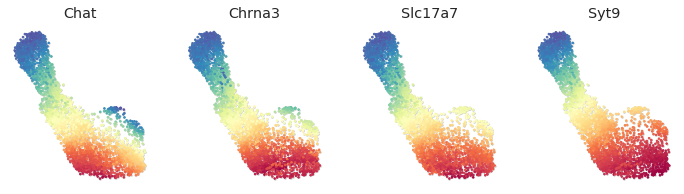

In [70]:
## MHb markers according to Stuber
palantir.plot.plot_gene_expression(imp_df, layout, ['Chat', 'Chrna3', 'Slc17a7', 'Syt9'])
fig = plt.gcf()
#fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_MHb_marker_1.pdf', dpi=80)

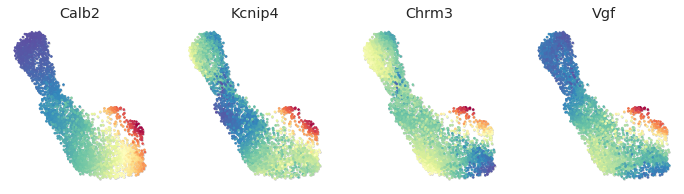

In [71]:
palantir.plot.plot_gene_expression(imp_df, layout, ['Calb2', 'Kcnip4', 'Chrm3', 'Vgf'])
fig = plt.gcf()
#fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_LHb_marker_2.pdf', dpi=80)

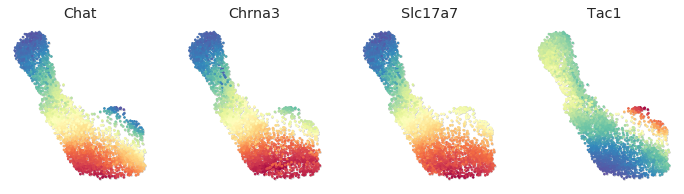

In [72]:
## Markers
palantir.plot.plot_gene_expression(imp_df, layout, ['Chat', 'Chrna3', 'Slc17a7', 'Tac1'])

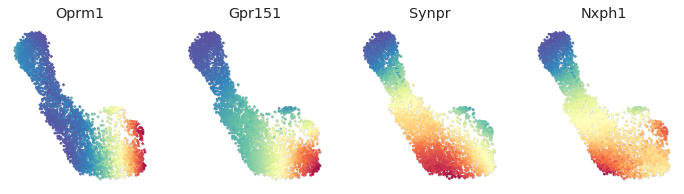

In [76]:
palantir.plot.plot_gene_expression(imp_df, layout, ['Oprm1', 'Gpr151', 'Synpr', 'Nxph1'])

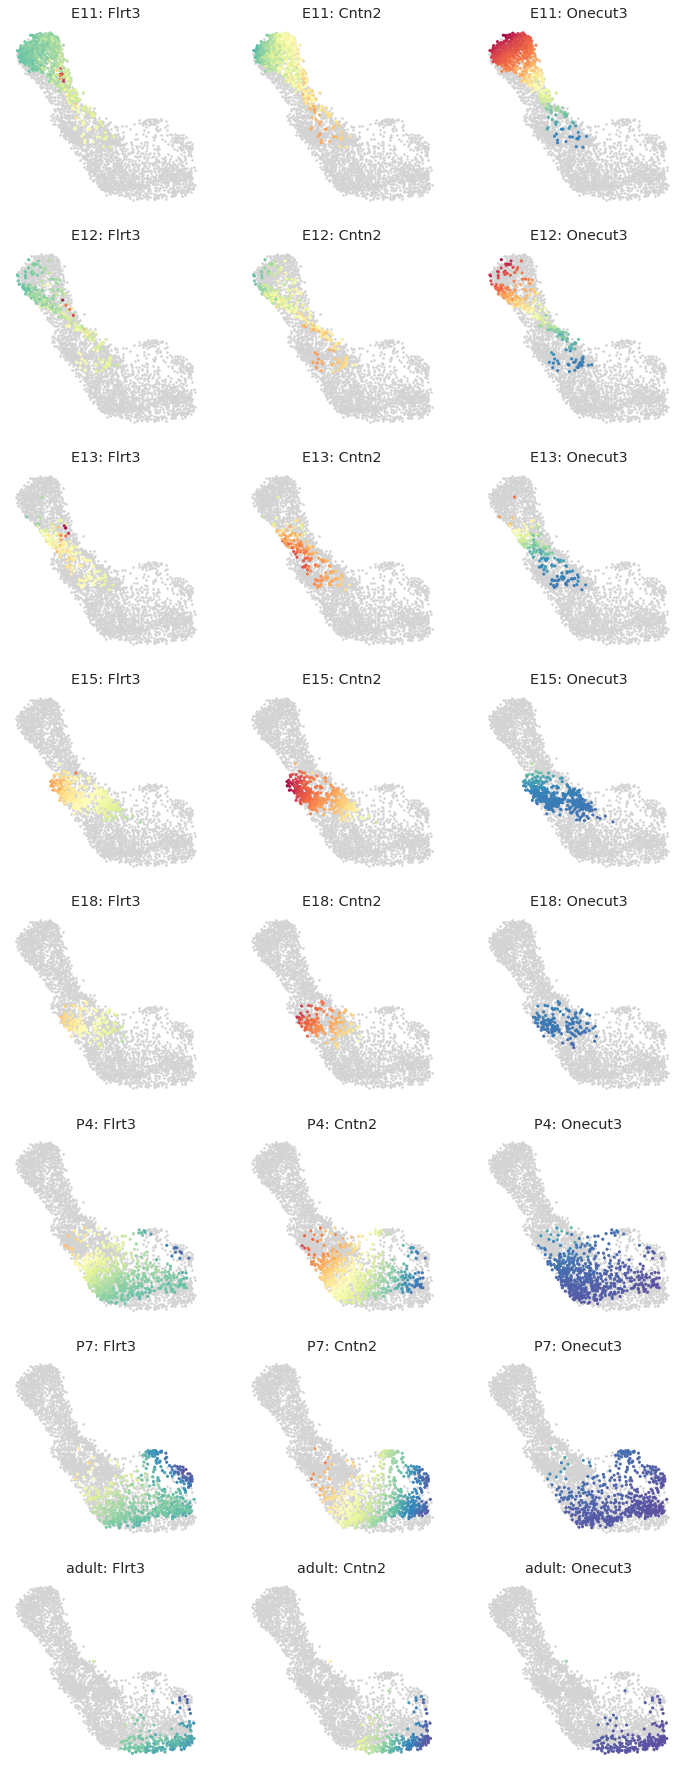

In [77]:
harmony.plot.plot_tp_gene_expression(imp_df, layout, ['Cntn2', 'Flrt3', 'Onecut3'], tp)

### Gene expression trends
Gene expression trends along Palantir inferred pseudo-time can be plotted as below. Palantir uses <a href="https://cran.r-project.org/web/packages/gam/">Generalized Additive Models (GAMs) </a> to determine the gene expression trends along different lineages. The marker trends can be determined using the following snippet. This computes the trends for all lineages. A subset of lineages can be used using the `lineages` parameter.

In [33]:
genes = ['Id3', 'Vim', 'Cntn2', 'Chat', "Calb2"]
gene_trends = palantir.presults.compute_gene_trends( pr_res, imp_df.loc[:, genes])

Chat
Time for processing Chat: 0.2394113540649414 minutes
Calb2
Time for processing Calb2: 0.011966315905253093 minutes


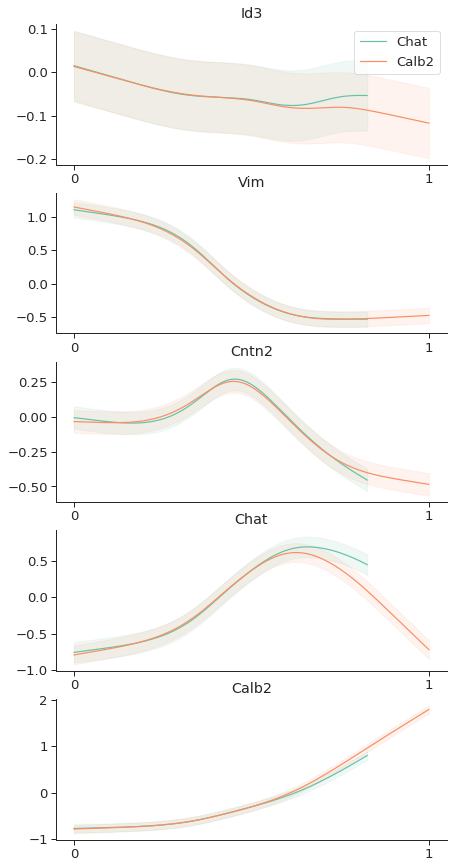

In [39]:
palantir.plot.plot_gene_trends(gene_trends)
fig = plt.gcf()
fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/gene_trends_GAM.pdf', dpi=80)

In [25]:
genes = ['Chat', 'Calb2', 'Tac1', 'Gpr151','Cntn2', 'Flrt3', 'Onecut3', 'Ano1', 'Cadps2', 'Slc17a7', 
         "Gabbr1", 'Syt9', 'Grm5', 'Gabra1', 'Cacna2d1', 
         'Grin2b', 'Cadps', 'Zfhx2', 'Cd47', 'Synpr']
gene_trends = palantir.presults.compute_gene_trends( pr_res, imp_df.loc[:, genes])

Chat
Time for processing Chat: 0.24274629751841229 minutes
Calb2
Time for processing Calb2: 0.02422347863515218 minutes


The determined trends can be visualized with the `plot_gene_trends` function. A separate panel is generated  for each gene

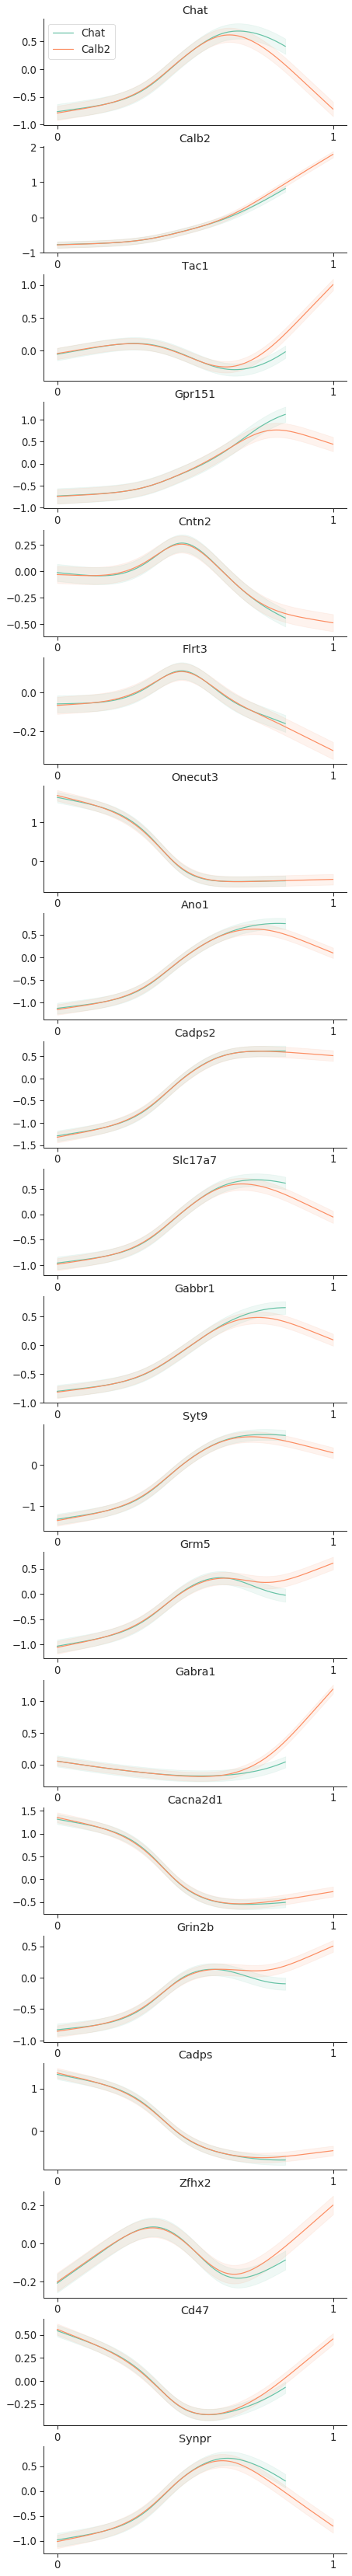

In [26]:
palantir.plot.plot_gene_trends(gene_trends)
fig = plt.gcf()
fig.savefig('../../../figures/embryo_Hb/gene_trends.pdf', dpi=80)

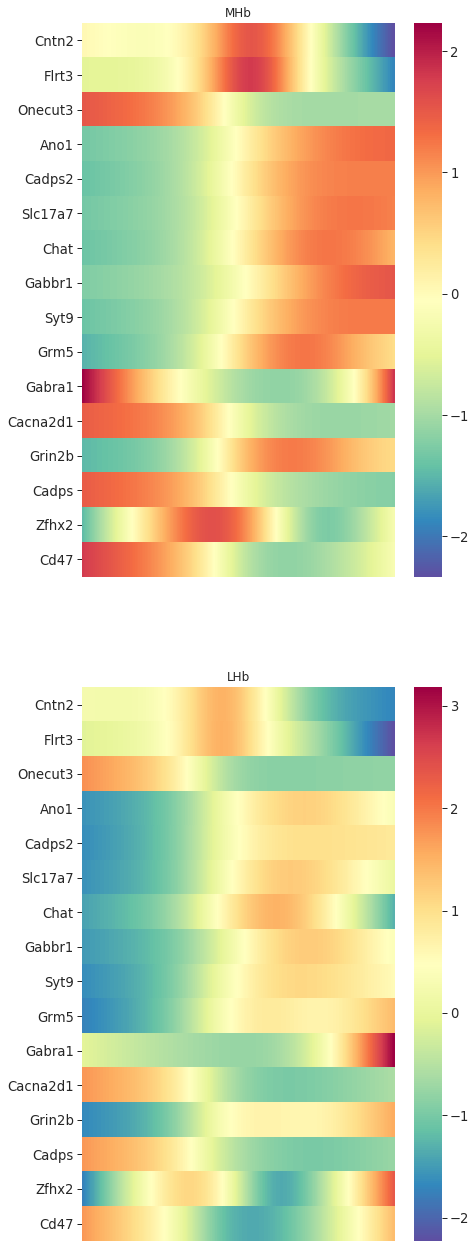

In [45]:
palantir.plot.plot_gene_trend_heatmaps(gene_trends)

In [14]:
genes = ['Onecut3', 'Cntn2', 'Flrt3', 'Syt9']
gene_trends = palantir.presults.compute_gene_trends( pr_res, imp_df.loc[:, genes])

Habenula_017___adult_2__X161
Time for processing Habenula_017___adult_2__X161: 0.1815554698308309 minutes
Habenula_019___P7_2__X043
Time for processing Habenula_019___P7_2__X043: 0.017890600363413493 minutes


In [ ]:
palantir.plot.plot_gene_trends(gene_trends)

## Find gene trend for lateral habenula

In [16]:
gene_trends = palantir.presults.compute_gene_trends(pr_res, 
                    imp_df.iloc[:, 0:1000], ['Chat'])

Chat
Time for processing Chat: 1.7963009039560953 minutes


In [44]:
trends = gene_trends['Chat']['trends']
gene_clusters_Chat = palantir.presults.cluster_gene_trends(trends)

Finding 150 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.45707201957702637 seconds
Jaccard graph constructed in 6.9514031410217285 seconds
Wrote graph to binary file in 1.1518349647521973 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.636449
Louvain completed 21 runs in 1.9288239479064941 seconds
PhenoGraph complete in 10.541538953781128 seconds


In [45]:
data = [(gene_clusters_Chat[gene_clusters_Chat == 0]).index, 
        (gene_clusters_Chat[gene_clusters_Chat == 1]).index,
        (gene_clusters_Chat[gene_clusters_Chat == 2]).index,
        (gene_clusters_Chat[gene_clusters_Chat == 3]).index,
        (gene_clusters_Chat[gene_clusters_Chat == 4]).index]

In [46]:
genes_chat = pd.DataFrame(data).T

In [47]:
genes_chat

0       1      2       3         4
0       H19      Th   Apoh   Igsf5      Klf6
1    Btbd17    Gmpr   Tbx2   Nalcn      Wnt3
2     Itgb2     Fap   Ngfr     Hk2     Pdgfb
3     Itga5   Grasp  Wnt9a  Col6a1      Sox9
4      Sez6  Gabra2  Ccnd2   Fndc5  Serpinf1
..      ...     ...    ...     ...       ...
277    Lrp2    None   None    None      None
278    Clp1    None   None    None      None
279   Traf6    None   None    None      None
280    Pax6    None   None    None      None
281   Pamr1    None   None    None      None

[282 rows x 5 columns]

In [49]:
genes_chat.to_csv(
    '../../../data/output/DevelopmentalHb/Mar2020_embryo_Hb_palantir_Chat_genetrends.csv')

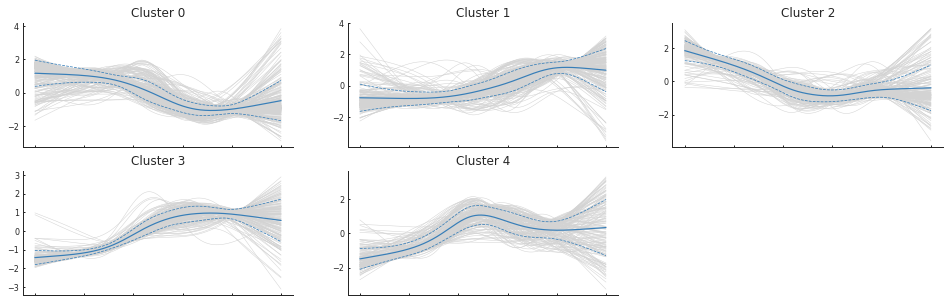

In [77]:
palantir.plot.plot_gene_trend_clusters(trends, gene_clusters_Chat)
fig = plt.gcf()
fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_Chat_gene_trends_clusters.pdf', figsize =(2,2), dpi=80)

## Find gene trend for medial habenula

In [51]:
gene_trends = palantir.presults.compute_gene_trends(pr_res, 
                    imp_df.iloc[:, 0:1000], ['Calb2'])

Calb2
Time for processing Calb2: 1.7953611373901368 minutes


In [54]:
trends = gene_trends['Calb2']['trends']
gene_clusters_Calb2 = palantir.presults.cluster_gene_trends(trends)

Finding 150 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.46804094314575195 seconds
Jaccard graph constructed in 7.097103834152222 seconds
Wrote graph to binary file in 1.034532070159912 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.568709
After 6 runs, maximum modularity is Q = 0.575234
Louvain completed 26 runs in 1.5195038318634033 seconds
PhenoGraph complete in 10.162063837051392 seconds


In [55]:
data = [(gene_clusters_Calb2[gene_clusters_Calb2 == 0]).index, 
        (gene_clusters_Calb2[gene_clusters_Calb2 == 1]).index,
        (gene_clusters_Calb2[gene_clusters_Calb2 == 2]).index,
        (gene_clusters_Calb2[gene_clusters_Calb2 == 3]).index,
        (gene_clusters_Calb2[gene_clusters_Calb2 == 4]).index]

In [56]:
genes_calb2 = pd.DataFrame(data).T

In [57]:
genes_calb2.to_csv(
    '../../../data/output/embryo_Hb/Mar2020_embryo_Hb_palantir_Calb2_genetrends.csv')

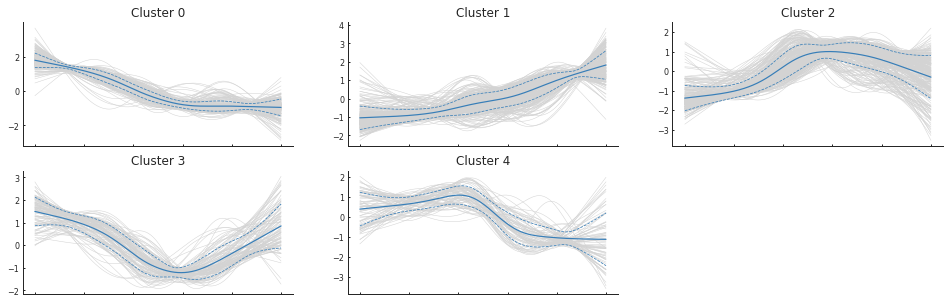

In [76]:
palantir.plot.plot_gene_trend_clusters(trends, gene_clusters_Calb2)
fig = plt.gcf()
fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_Calb2_gene_trends_clusters.pdf', figsize =(2,2), dpi=80)

In [36]:
test = gene_clusters_Chat[gene_clusters_Chat == 0]
dev_genes = list(test.index.values)
dev_genes = sorted(dev_genes)
dev_genes

['2810408A11Rik',
 'Adam8',
 'Adora2a',
 'Aif1l',
 'Angptl2',
 'Ascl1',
 'Atp6v0e',
 'B3gat2',
 'B3gnt5',
 'Baiap2',
 'Barhl1',
 'Birc5',
 'Boc',
 'Bok',
 'Btbd17',
 'Cacna1b',
 'Cacna1h',
 'Carhsp1',
 'Cbx2',
 'Ccl3',
 'Cd180',
 'Cd34',
 'Cd52',
 'Cdh2',
 'Cdh7',
 'Cdh9',
 'Cdk4',
 'Chn2',
 'Clmn',
 'Clp1',
 'Col19a1',
 'Col2a1',
 'Col5a2',
 'Corin',
 'Coro1c',
 'Crhbp',
 'Crip2',
 'Cryba1',
 'Csmd3',
 'Ctsz',
 'Cyba',
 'Cybb',
 'D16Ertd472e',
 'Dach2',
 'Dclre1c',
 'Ddah2',
 'Ddr1',
 'Def6',
 'Degs2',
 'Dhfr',
 'Dll1',
 'Dll3',
 'Dmc1',
 'Dnah5',
 'Dpf3',
 'Dusp1',
 'Ebf3',
 'Efna2',
 'Efnb2',
 'Elavl2',
 'Emb',
 'Emilin2',
 'Eng',
 'Enpp2',
 'Epb41l2',
 'Epb41l4a',
 'Epha4',
 'Ephb3',
 'Eya4',
 'F5',
 'Fam234a',
 'Fbln1',
 'Fcgr1',
 'Fezf2',
 'Fgf9',
 'Fn1',
 'Folr1',
 'Fst',
 'Fyn',
 'Gab2',
 'Gadd45g',
 'Gal',
 'Gcnt2',
 'Gdpd2',
 'Gli3',
 'Golm1',
 'Grm3',
 'H19',
 'Hcn1',
 'Hells',
 'Hif3a',
 'Hist1h2bc',
 'Hmgcr',
 'Hmgn2',
 'Hyal1',
 'Idh1',
 'Igf2bp1',
 'Igf2r',
 'Iqgap2',
 '

In [60]:
test = gene_clusters_Calb2[gene_clusters_Calb2 == 1]
Calb2_genes = list(test.index.values)

In [61]:
test = gene_clusters_Chat[gene_clusters_Chat == 1]
Chat_genes_1 = list(test.index.values)

In [62]:
test = gene_clusters_Chat[gene_clusters_Chat == 3]
Chat_genes_2 = list(test.index.values)

In [63]:
len(Chat_genes_1)

217

In [64]:
len(Chat_genes_2)

161

In [65]:
Chat_genes = Chat_genes_1 + Chat_genes_2

In [67]:
## find unique markers that go up in LHb
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans

Chat_unique = setdiff_sorted(Chat_genes,Calb2_genes)
Chat_unique = sorted(Chat_unique)

with open('../../../data/output/DevelopmentalHb/Chat_unique_genes.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % place for place in Chat_unique)

len(Chat_unique)

160

In [68]:
## find unique markers that go up in MHb
Calb2_unique = setdiff_sorted(Calb2_genes,Chat_genes)
Calb2_unique = sorted(Calb2_unique)

with open('../../../data/output/DevelopmentalHb/Calb2_unique_genes.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % place for place in Calb2_unique)

len(Calb2_unique)

58

In [69]:
gene_trends = palantir.presults.compute_gene_trends( pr_res, imp_df.loc[:, Calb2_unique])

Chat
Time for processing Chat: 0.30867966413497927 minutes
Calb2
Time for processing Calb2: 0.07328160206476847 minutes


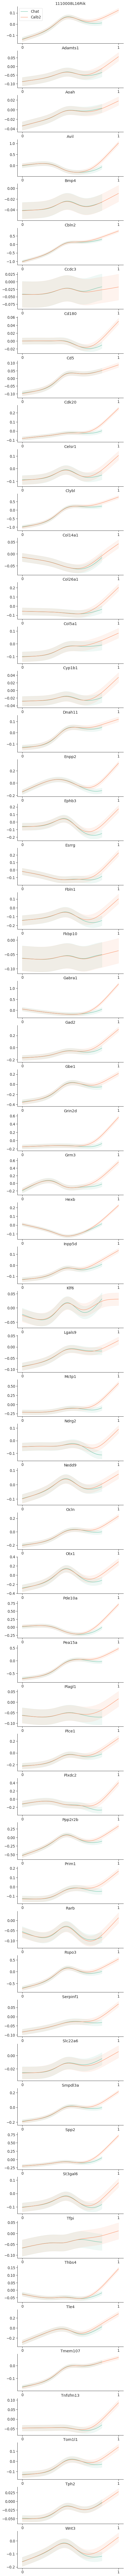

In [70]:
palantir.plot.plot_gene_trends(gene_trends)

In [71]:
gene_trends = palantir.presults.compute_gene_trends( pr_res, imp_df.loc[:, Chat_unique])

Chat
Time for processing Chat: 0.1967129349708557 minutes
Calb2
Time for processing Calb2: 0.20799883206685385 minutes


In [ ]:
palantir.plot.plot_gene_trends(gene_trends)

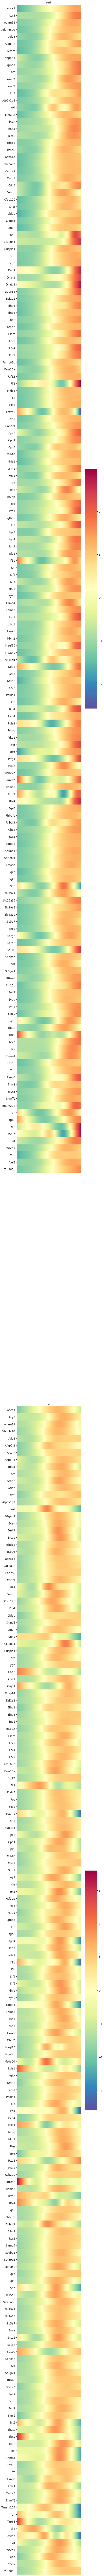

In [81]:
palantir.plot.plot_gene_trend_heatmaps(gene_trends)

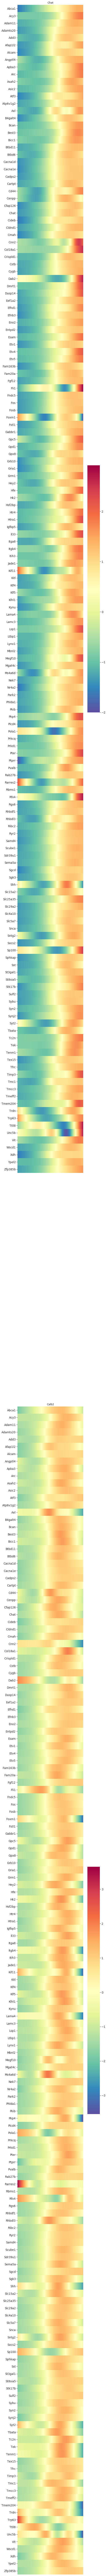

In [73]:
palantir.plot.plot_gene_trend_heatmaps(gene_trends)
fig = plt.gcf()
fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_Chat_gene_trends.pdf', figsize =(2,2), dpi=80)

In [74]:
gene_trends = palantir.presults.compute_gene_trends( pr_res, imp_df.loc[:, Calb2_unique])

Chat
Time for processing Chat: 0.2573008497556051 minutes
Calb2
Time for processing Calb2: 0.10299936930338542 minutes


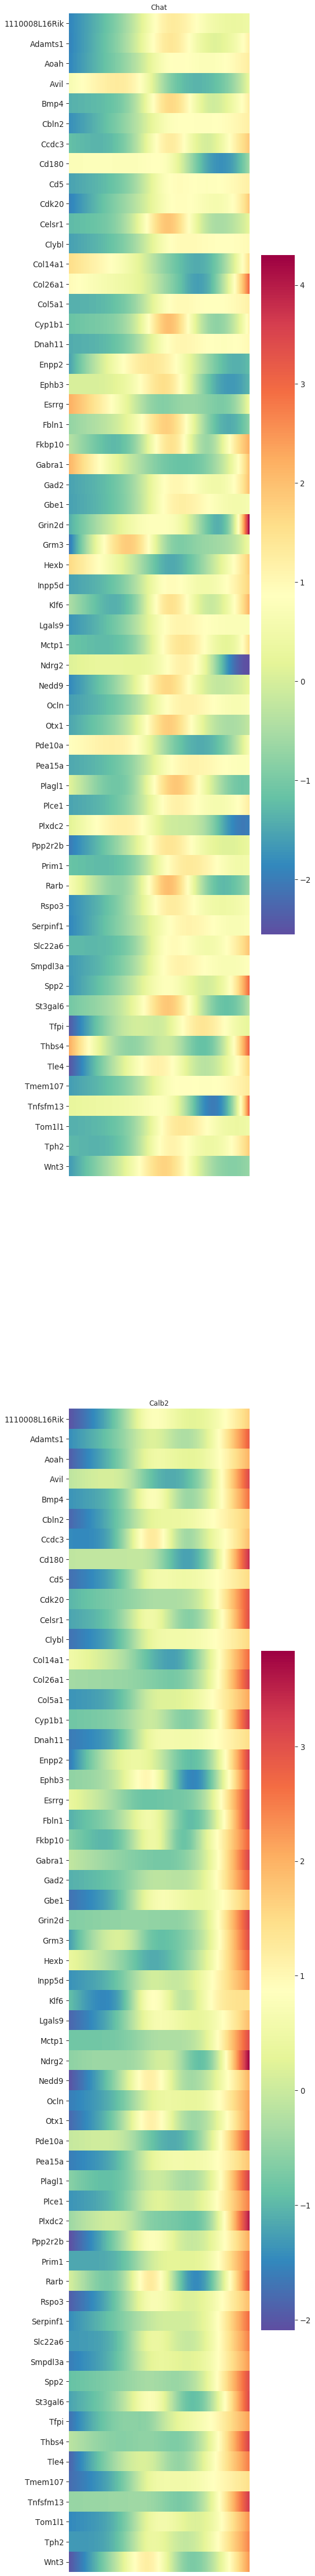

In [75]:
palantir.plot.plot_gene_trend_heatmaps(gene_trends)
fig = plt.gcf()
fig.savefig('../../../figures/DevelopmentalHb/TrajectoryInference/palantir_Calb2_gene_trends.pdf', dpi=80)

In [260]:
adata.write('../../../data/output/DevelopmentalHb/Mar2020_embryo_Hb_Pou4f1_Harmony_Palantir_final.h5ad')